In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
upload = files.upload()


customer_csv = pd.read_csv('Customers.csv')
product_csv = pd.read_csv('Products.csv')
transactions_csv = pd.read_csv('Transactions.csv')

Saving Customers.csv to Customers.csv
Saving Data Science Intern _ Assignment (1).pdf to Data Science Intern _ Assignment (1).pdf
Saving Products.csv to Products.csv
Saving Transactions.csv to Transactions.csv


In [ ]:
print(customer_csv.describe)

<bound method NDFrame.describe of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>


In [3]:
customer_csv['SignupDate'] = pd.to_datetime(customer_csv['SignupDate'])
transactions_csv['TransactionDate'] = pd.to_datetime(transactions_csv['TransactionDate'])

In [4]:
print("Duplicate Customers:", customer_csv.duplicated().sum())
print("Duplicate Products:", product_csv.duplicated().sum())
print("Duplicate Transactions:", transactions_csv.duplicated().sum())

Duplicate Customers: 0
Duplicate Products: 0
Duplicate Transactions: 0


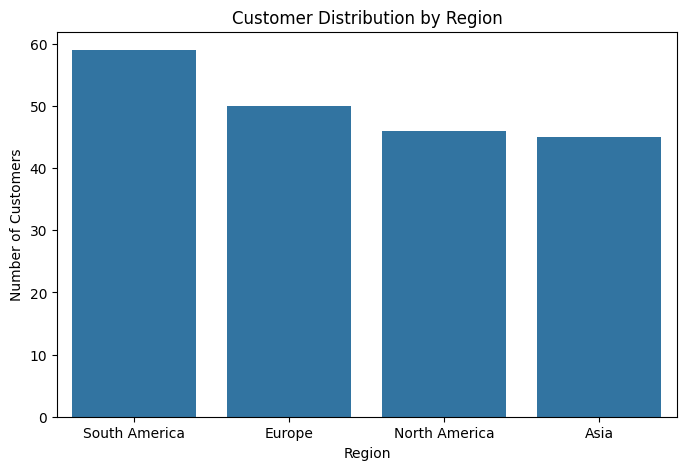

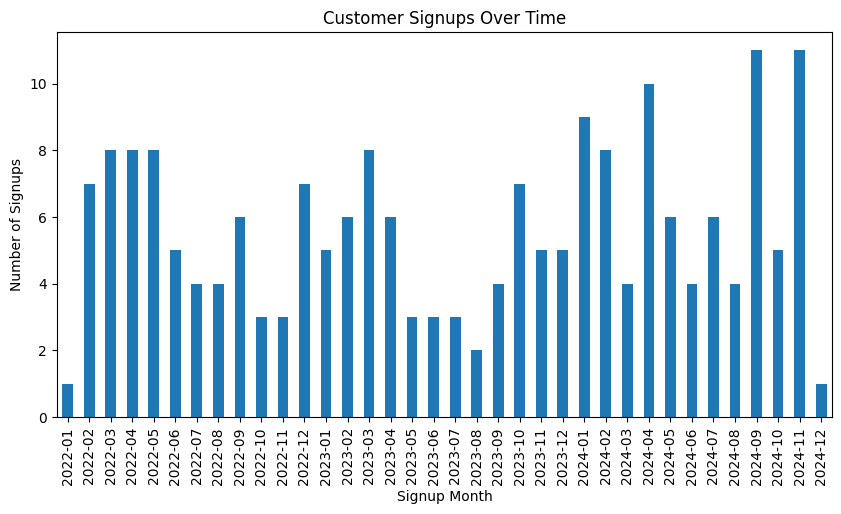

In [5]:
plt.figure(figsize=(8, 5))
sb.countplot(data=customer_csv, x='Region', order=customer_csv['Region'].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

customer_csv['SignupMonth'] = customer_csv['SignupDate'].dt.to_period('M')

signup_trend = customer_csv.groupby('SignupMonth')['CustomerID'].count()
#print(signup_trend)
signup_trend.plot(kind='bar', figsize=(10, 5), title="Customer Signups Over Time")
plt.ylabel("Number of Signups")
plt.xlabel("Signup Month")
plt.show()


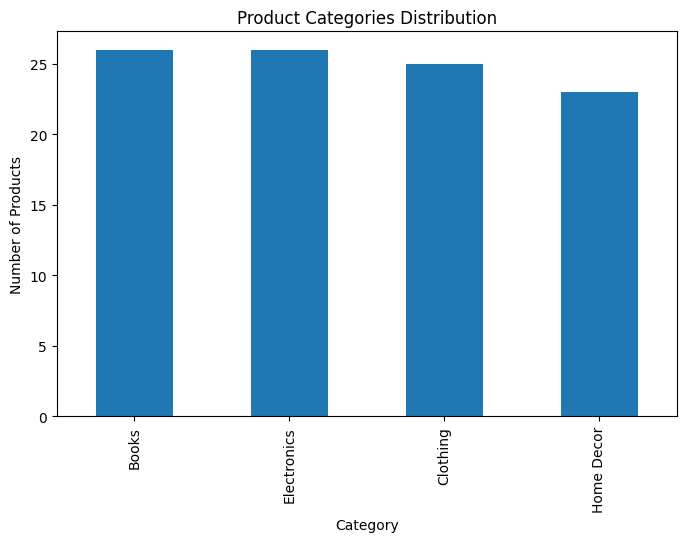

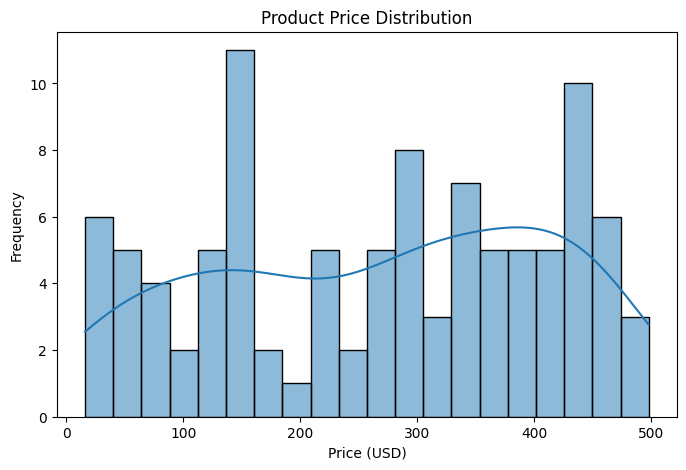

In [6]:
top_categories = product_csv['Category'].value_counts()
plt.figure(figsize=(8, 5))
top_categories.plot(kind='bar', title="Product Categories Distribution")
plt.ylabel("Number of Products")
plt.xlabel("Category")
plt.show()


plt.figure(figsize=(8, 5))
sb.histplot(product_csv['Price'], kde=True, bins=20)
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


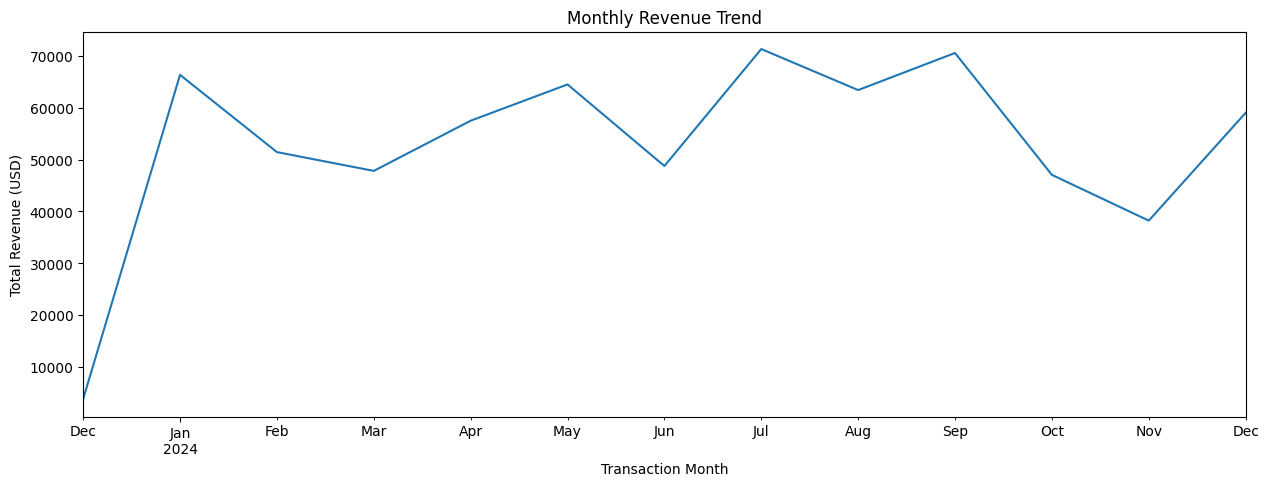

In [7]:
transactions_csv['TransactionMonth'] = transactions_csv['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions_csv.groupby('TransactionMonth')['TotalValue'].sum()
monthly_revenue.plot(kind='line', figsize=(15,5), title="Monthly Revenue Trend")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Transaction Month")
plt.show()


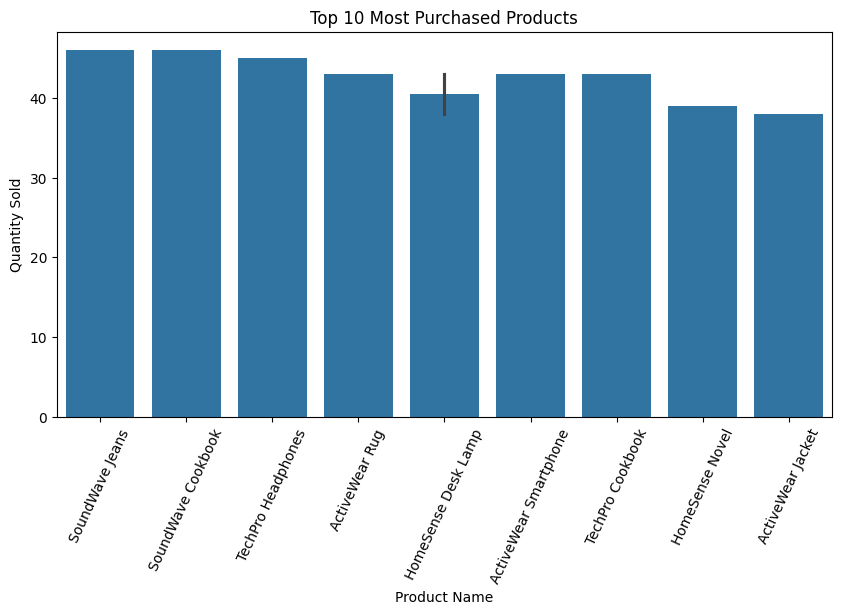

In [8]:
top_products = transactions_csv.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index().merge(product_csv[['ProductID', 'ProductName']], on='ProductID')
plt.figure(figsize=(10, 5))
sb.barplot(data=top_products, x='ProductName', y='Quantity')
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=65)
plt.show()

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'SignupMonth'], dtype='object') Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'TransactionMonth'],
      dtype='object') Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
